In [31]:
import numpy as np
import random
import matplotlib.pyplot  as plt
import math
%matplotlib inline

In [78]:
X = []
for i in range(50):
    X.append( random.randint(0,100))

In [79]:
X

[31,
 87,
 81,
 7,
 59,
 92,
 87,
 95,
 19,
 87,
 89,
 83,
 69,
 62,
 66,
 64,
 86,
 64,
 91,
 18,
 48,
 70,
 5,
 1,
 8,
 10,
 73,
 34,
 1,
 92,
 60,
 81,
 89,
 65,
 64,
 66,
 47,
 32,
 35,
 23,
 55,
 42,
 97,
 62,
 26,
 47,
 98,
 86,
 44,
 85]

In [80]:
Y = []
for i in range(50):
    Y.append( random.randint(0,100))

In [35]:
Y

[31, 37, 97, 43, 31, 96, 82, 67, 45, 44, 86, 90, 81, 1, 33]

In [36]:
C1 = [random.randint(0,100),random.randint(0,100)]
C2 = [random.randint(0,100),random.randint(0,100)]

In [37]:
def plot_before_cluster(X,Y,C1,C2):
    _=plt.scatter(X,Y)
    _ = plt.scatter(C1[0],C1[1],color='red',marker='*')
    _ = plt.scatter(C2[0],C2[1],color='orange',marker='*')
    plt.show()
    

In [38]:
def calculate_distance(x,y,C):
    return math.sqrt((x-C[0])**2 + (y-C[1])**2)


In [39]:
def calculate_centroid(cluster1,cluster2,x,y,C1,C2):
    x_sum1=0
    y_sum1=0
    x_sum2=0
    y_sum2=0
    for i in range(15):
        if i in cluster1:
            x_sum1 += x[i]
            
        
            y_sum1 += y[i]
            
        else:
            x_sum2 += x[i]
        
            y_sum2 += y[i]
    x_sum1+= C1[0]
    y_sum1+= C1[1]
    x_sum2+= C2[0]
    y_sum2+= C2[1]
    
    x_sum1 , y_sum1 = int(x_sum1/(len(cluster1)+1)),int(y_sum1/(len(cluster1)+1))
    x_sum2 , y_sum2 = int(x_sum2/(len(cluster2)+1)),int(y_sum2/(len(cluster2)+1)) 
    
    C1 = [x_sum1,y_sum1]
    C2 = [x_sum2,y_sum2]
    
    return C1, C2

    

In [40]:
def plot_after_clusterin(X,Y,C1,C2,cluster1,cluster2):
    _ = plt.scatter(C1[0],C1[1],color='red',marker='*')
    _ = plt.scatter(C2[0],C2[1],color='orange',marker='*')
    for i in cluster1:
        _ = plt.scatter(X[i],Y[i],color='pink')
    for i in cluster2:
        _ = plt.scatter(X[i],Y[i],color='brown')
    plt.show()
    

In [41]:
def create_clusters(X,Y,C1,C2):
    cluster1=[]
    cluster2=[]
    for i in range(15):
        x1 = calculate_distance(X[i],Y[i],C1)
        x2 = calculate_distance(X[i],Y[i],C2)
        if(x1 > x2):
            cluster2.append(i)
        else:
            cluster1.append(i)
    return cluster1 ,cluster2

In [96]:
def Kmeans(X,Y,C1,C2):
    prevC1=[0,0]
    prevC2=[0,0]
    plot_before_cluster(X,Y,C1,C2)
    

    while not(prevC1==C1 and prevC2==C2): #not(prevC1[0]==C1[0] and prevC1[1]==C1[1] and prevC2[0]==C2[0] and prevC2[1]==C2[1]):
        
        cluster1,cluster2=create_clusters(X,Y,C1,C2)
        plot_after_clusterin(X,Y,C1,C2,cluster1,cluster2)

        prevC1=C1
        prevC2=C2
        C1, C2 = calculate_centroid(cluster1,cluster2,X,Y,C1,C2)

        
        
def createClusters(number_of_clusters):
    C=[]
    if number_of_clusters>0:
        for i in range(number_of_clusters):
            C.append([random.randint(0,100),random.randint(0,100)])
    else:
        print("Invalid number of clusters")
    return C
def plot_before_cluster_modified(X,Y,C,colors):
    _=plt.scatter(X,Y)
    for i in range(len(C)):
        _ = plt.scatter(C[i][0],C[i][1],color=colors[i],marker='*')
    plt.show()
def create_clusters_modified(X,Y,C):
    clusters=[]
    for i in range(len(C)):
        clusters.append([])
    
    for i in range(len(X)):
        x=[]
        for j in range(len(C)):
            x.append(calculate_distance(X[i],Y[i],C[j]))
        
        clusters[x.index(min(x))].append(i)
    return clusters
def plot_after_clustering_modified(X,Y,C,clusters,colors):
    
    for i in range(len(C)):
        
        _ = plt.scatter(C[i][0],C[i][1],color=colors[i],marker='*')
    for i in range(len(X)):
        for j in range(len(clusters)):
            if i in clusters[j]:
                _ = plt.scatter(X[i],Y[i],color=colors[j])
    plt.show()
def calculate_centroid_modified(clusters,x,y,C):
    XYsum=[x[:] for x in [[0] * 2] * len(C)]
    for i in range(len(x)):
        for j in range(len(clusters)):
            if i in clusters[j]:
                XYsum[j][0]+=X[i]
                XYsum[j][1]+=Y[i]
    for i in range(len(clusters)):
        XYsum[i][0]+=C[i][0]
        XYsum[i][1]+=C[i][1]
        XYsum[i][0]=round(XYsum[i][0]/(len(clusters[i])+1),4)
        XYsum[i][1]=round(XYsum[i][1]/(len(clusters[i])+1),4)
    return XYsum
   

def Kmeans_modified(X,Y,num_of_clusters):
    prevC=[]
    colors=[]
    for i in range(num_of_clusters):
        colors.append(np.random.rand(3,))
    C=createClusters(num_of_clusters)
    plot_before_cluster_modified(X,Y,C,colors)
    while not(prevC == C):
        clusters = create_clusters_modified(X,Y,C)
        plot_after_clustering_modified(X,Y,C,clusters,colors)
        prevC=C.copy()
        C= calculate_centroid_modified(clusters,X,Y,C)
    return C,clusters,colors

def plot_with_new_data(X,Y,C,clusters,colors,newx,newy):
    
    for i in range(len(C)):
        
        _ = plt.scatter(C[i][0],C[i][1],color=colors[i],marker='*')
    for i in range(len(X)):
        for j in range(len(clusters)):
            if i in clusters[j]:
                _ = plt.scatter(X[i],Y[i],color=colors[j])
    _ = plt.scatter(newx,newy,marker="P",color='black')
    plt.show()
def find_cluster(C,colors,newx,newy):
    x=[]
    for j in range(len(C)):
        x.append(calculate_distance(newx,newy,C[j]))
        
    return colors[x.index(min(x))]
def plot_with_new_data_result(X,Y,C,clusters,colors,newx,newy,color_new):
    
    for i in range(len(C)):
        
        _ = plt.scatter(C[i][0],C[i][1],color=colors[i],marker='*')
    for i in range(len(X)):
        for j in range(len(clusters)):
            if i in clusters[j]:
                _ = plt.scatter(X[i],Y[i],color=colors[j])
    _ = plt.scatter(newx,newy,marker="P",color=color_new)
    plt.show()    
def KNN(k,X,Y,C,clusters,colors,newx,newy):
    plot_with_new_data(X,Y,C,clusters,colors,newx,newy)
    color_identified = find_cluster(C,colors,newx,newy)
    plot_with_new_data_result(X,Y,C,clusters,colors,newx,newy,color_identified)
    
    
    


    


In [97]:
#Kmeans(X,Y,C1,C2)

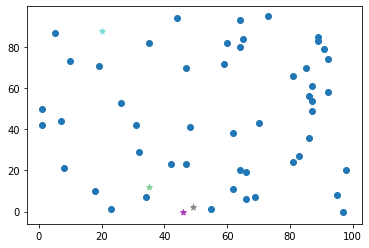

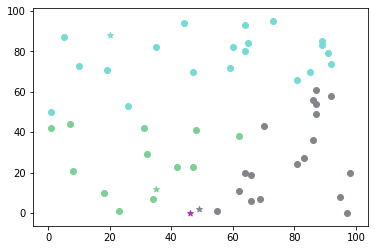

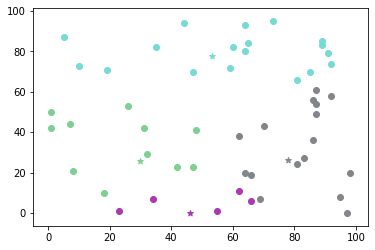

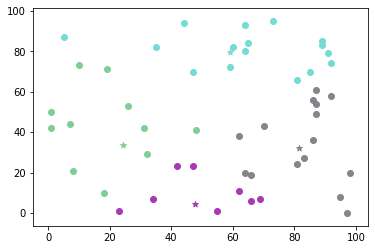

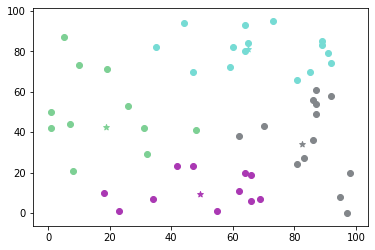

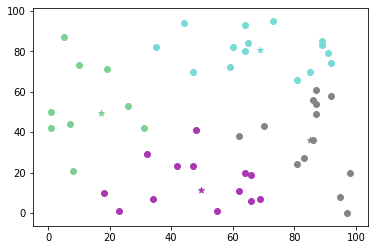

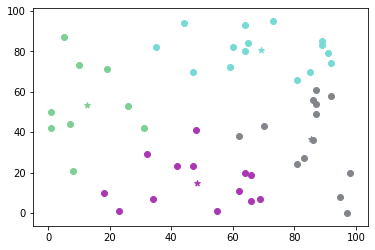

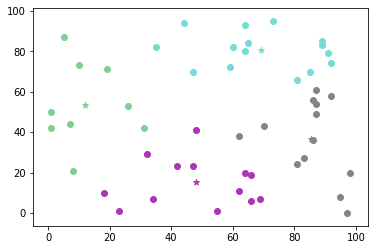

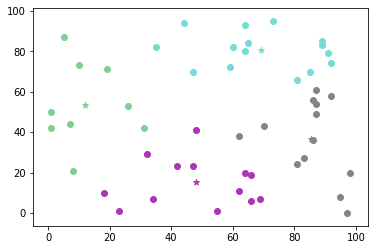

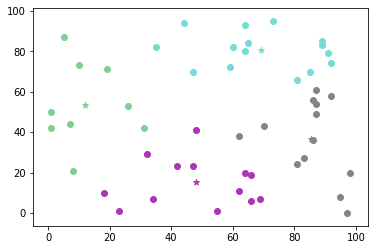

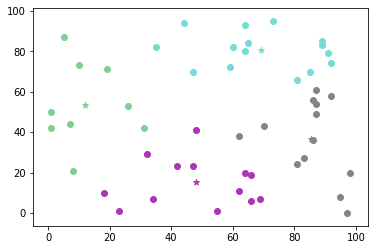

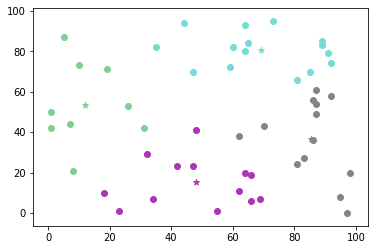

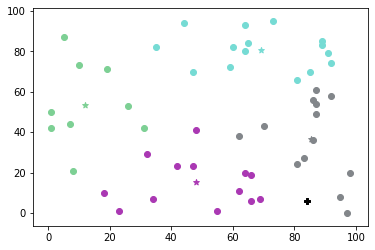

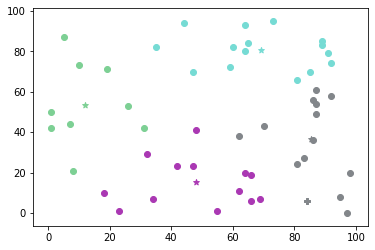

In [98]:
C,clusters,colors=Kmeans_modified(X,Y,4)
k=3
newX=random.randint(0,100)
newY=random.randint(0,100)
KNN(k,X,Y,C,clusters,colors,newX,newY)

In [82]:
x=2.33333333333333333333333
round(x,2)

2.33